In [12]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm, multivariate_normal

In [3]:
rv = norm(loc = 0., scale = 2.0)

In [4]:
rv.pdf(range(0,4)) / min(rv.pdf(range(0,4)))

array([3.08021685, 2.71828183, 1.86824596, 1.        ])

In [5]:
rv.sf(range(0,4)) / min(rv.sf(range(0,4)))

array([7.48422312, 4.61832756, 2.37482264, 1.        ])

In [6]:
0.4/0.24

1.6666666666666667

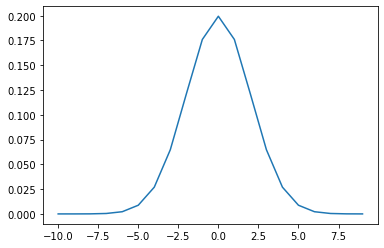

In [7]:
rv = norm(loc = 0., scale = 2.0)
r = range(-10,10)
plt.plot(r, rv.pdf(r))

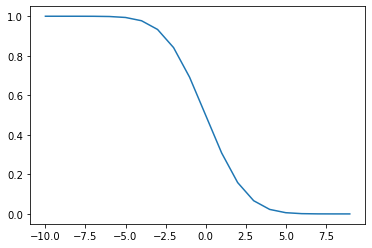

In [8]:
r = range(-10, 10)
plt.plot(r, rv.sf(r))

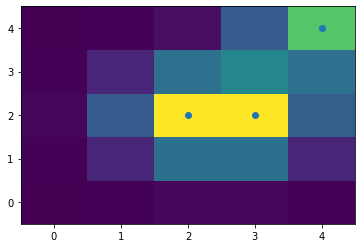

In [193]:
two_d = multivariate_normal([2, 2], [0.5, 0.5])
x, y = np.meshgrid(np.arange(0,5, 1), np.arange(0,5, 1))

two_d2 = multivariate_normal([3, 2], [0.5, 0.5])
x2, y2 = np.meshgrid(np.arange(0,5, 1), np.arange(0,5, 1))

two_d3 = multivariate_normal([4, 4], [0.5, 0.5])
x3, y3 = np.meshgrid(np.arange(0,5, 1), np.arange(0,5, 1))

pos = np.dstack((x, y))
pos2 = np.dstack((x2, y2))
pos3 = np.dstack((x3, y3))
z = np.zeros(np.shape(two_d.pdf(pos)))
for p, pdf in zip([ pos3,pos, pos2,], [ two_d3,two_d, two_d2,]):
    tmp = pdf.pdf(p)
    z += tmp
#     z = np.clip(z,a_min=0, a_max=1)
z = (z - np.min(z))/np.ptp(z)  # Optional
# Normalised [0,1]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.pcolormesh(x, y, z, shading="auto")
plt.scatter([2, 3, 4], [2, 2, 4])
plt.show()

In [14]:
weights = []
for i in range(-10, 10):
    if (2>i) and (i >-2):
        random = np.random.randint(0,4)
        weights.append(np.append(np.zeros(10 + random), np.ones(10-random)) )
    else:
        weights.append(np.ones(20))

In [185]:
weights = []
for i in range(0,5):
    weights.append(np.append(np.zeros(2), np.ones(3)))

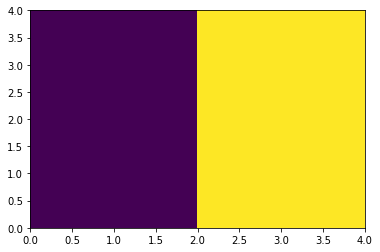

In [187]:
x, y = np.meshgrid(np.arange(0,5), np.arange(0,5))

pos = np.dstack((x, y))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_ylim(0,4)
ax2.set_xlim(0,4)
ax2.pcolormesh(x, y, np.stack(weights, axis=0)[:-1, :-1], shading='flat')
plt.show()

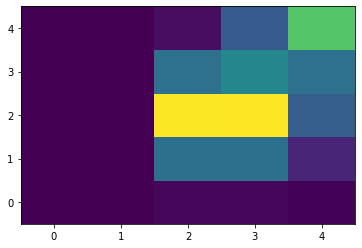

In [189]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.pcolormesh(x, y, np.stack(weights, axis=0) * z, shading="auto")

In [229]:
from itertools import product

In [289]:
mean = [2, 1, 2]
cov = [[1,0, 0], [0,1,0] , [0,0,1]]
three_d = multivariate_normal(mean, cov)

mean2 = [2, 1, 3]
cov2 = [[1,0, 0], [0,1,0] , [0,0,1]]
three_d2 = multivariate_normal(mean2, cov2)

mean3 = [2, 3, 3]
cov3 = [[1,0, 0], [0,1,0] , [0,0,1]]
three_d3 = multivariate_normal(mean3, cov3)

c = [three_d.pdf(t) + three_d2.pdf(t) + three_d3.pdf(t) for t in product(range(5), repeat=3)]

In [290]:
x = [t[0] for t in product(range(5), repeat=3)]
y = [t[1] for t in product(range(5), repeat=3)]
z = [t[2] for t in product(range(5), repeat=3)]

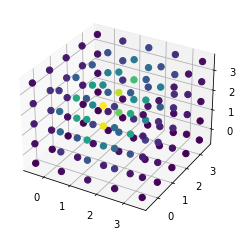

In [303]:
ax = plt.axes(projection='3d')
ax.scatter3D(np.array(x)-0.5, np.array(y)-0.5, np.array(z)-0.5, c=c, s=40, depthshade=False);

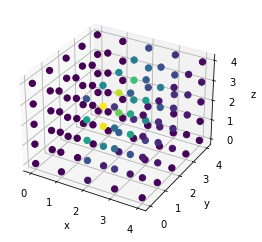

In [306]:
cond = np.array([True if t[0]>=2 else False for t in product(range(5), repeat=3) ])
c = (c - np.min(c))/np.ptp(c)
ax = plt.axes(projection='3d')
ax.scatter3D(np.array(x), np.array(y), np.array(z), c=np.where(cond, c, 0), s=40, depthshade=False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

TypeError: '<' not supported between instances of 'list' and 'int'

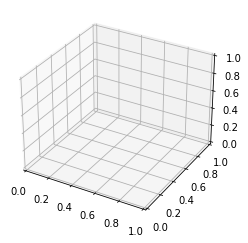

In [296]:
ax = plt.axes(projection='3d')
ax.scatter3D(x*np.where(y<0, 0, 1), y, z*np.where(y<0, 0, 1), c=c);

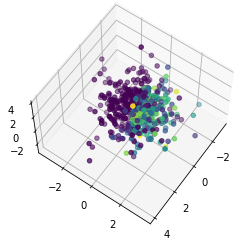

In [24]:
ax = plt.axes(projection='3d')
ax.view_init(60,35)
ax.scatter3D(x, y, z,c=c*np.where(y<0, 0, 1));